## Compare Cellpose3/Cellpose4 cyto3/cpsam



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


Cellpose version: 4.0.1 (major number: 4)


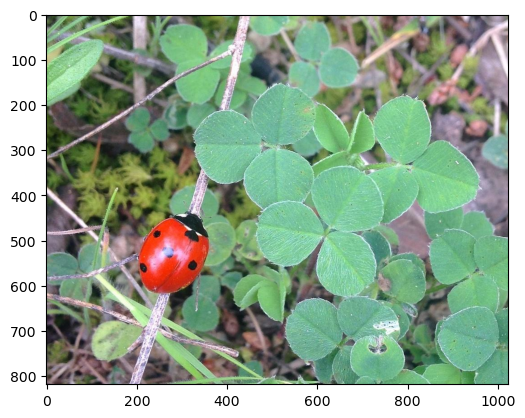

In [1]:
import napari
import glob
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
import napari
import cellpose
#from tnia.plotting.plt_helper import imshow2d

image = imread("211122_AM_Al2O3_SE_021.ome.tiff")
image = imread("poor_quality_with_watermark.jpg")
image = imread("620818_780868.jpg")

plt.imshow(image)

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")


In [3]:
from cellpose import models, io
from skimage.io import imsave

model = models.CellposeModel(gpu=True)
result = model.eval(image, cellprob_threshold = -2, flow_threshold=1.0, niter=2000, diameter=10)
result_name = 'result_defaults_'+ cellpose.version + '.tif'
imsave(result_name, result[0])

try:
    print('diameter mean', model.diam_mean)
except:
    print("Call to model.diam_mean failed in version " + cellpose.version)


model = models.CellposeModel(gpu=True, model_type='cyto3')
result = model.eval(image, niter=2000)
result_name = 'result_cyto3_CPM_' + cellpose.version + '.tif'
imsave(result_name, result[0])

try:
    model = models.Cellpose(gpu=True, model_type='cyto3')
    result = model.eval(image, niter=2000)
    result_name = 'result_cyto3_CP_' + cellpose.version + '.tif'
    imsave(result_name, result[0])
except:
    print("Call to model.Cellpose failed in version " + cellpose.version)

c:\Users\bnort\miniconda3\envs\microsam_cellose_sam\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: result_defaults_4.0.1.tif is a low contrast image
  return func(*args, **kwargs)
model_type argument is not used in v4.0.1+. Ignoring this argument...


Call to model.diam_mean failed in version 4.0.1
Call to model.Cellpose failed in version 4.0.1


c:\Users\bnort\miniconda3\envs\microsam_cellose_sam\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: result_cyto3_CPM_4.0.1.tif is a low contrast image
  return func(*args, **kwargs)


In [4]:

viewer = napari.Viewer()
viewer.add_image(image, name='image')

# Get all files starting with 'result_' and ending with common image extensions
image_files = glob.glob("result_*.tif") 

for image_file in image_files:
    # Read the image file
    image_data = imread(image_file)
    
    # Add the image to the viewer
    viewer.add_labels(image_data, name=image_file)

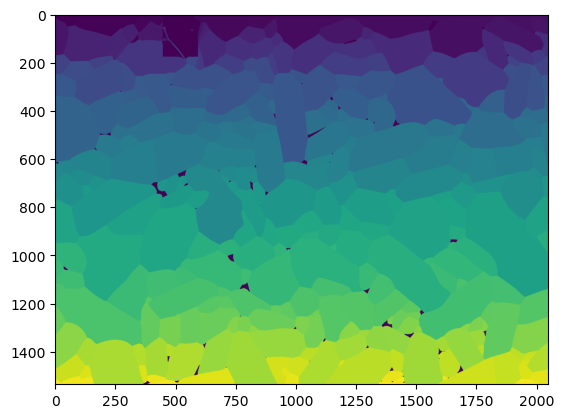

In [17]:
result = model.eval(image, cellprob_threshold = -2, flow_threshold=1.0, niter=20000)#, bsize=512)

plt.imshow(result[0])


In [18]:
viewer.add_labels(result[0], name='result_20000')

<Labels layer 'result_20000' at 0x1fcbc6b75d0>

In [19]:
result = model.eval(image, diameter=60, cellprob_threshold = -1, flow_threshold=0.4, niter=2000)#, bsize=512)

In [20]:
viewer.add_labels(result[0], name='result_20000')

<Labels layer 'result_20000 [1]' at 0x1fca50ff750>